In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Загрузка данных из CSV файла
data = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_power.jtl', low_memory=False)

# Преобразование времени в читаемый формат, если необходимо
data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='ms')

# Фильтрация по столбцу sampleLabel
sample_labels = data['label'].unique()

## Диаграммы плотности

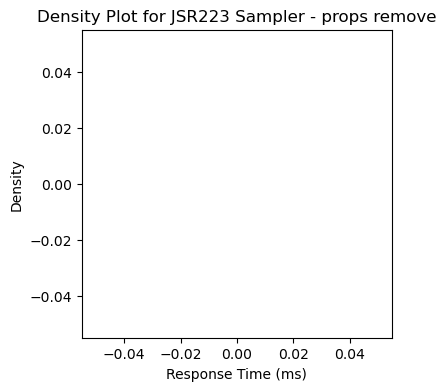

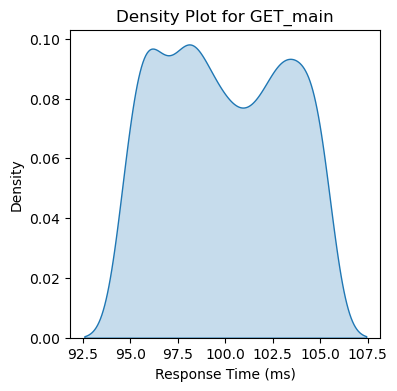

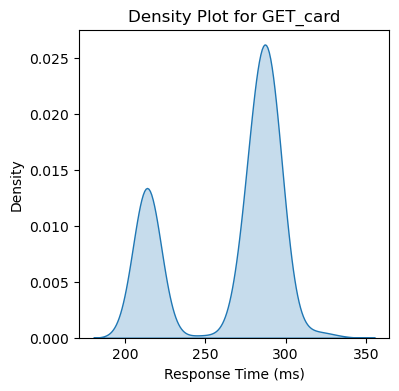

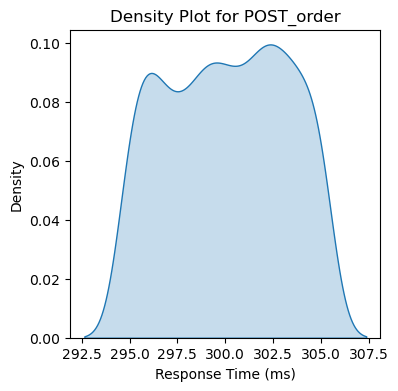

In [18]:
# Итерация по каждому уникальному sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]  # Фильтрация по метке

    # Построение диаграммы плотности
    plt.figure(figsize=(4, 4))
    sns.kdeplot(subset['elapsed'], fill=True)
    plt.title(f'Density Plot for {label}')
    plt.xlabel('Response Time (ms)')
    plt.ylabel('Density')
    plt.show()

In [19]:
# Нормализация responseTime
scaler = StandardScaler()

# Применение нормализации для каждого sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]
    subset['responseTime_normalized'] = scaler.fit_transform(subset[['elapsed']])
    
    # Обновляем данные после нормализации
    data.loc[data['label'] == label, 'responseTime_normalized'] = subset['responseTime_normalized']


In [5]:
data

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,responseTime_normalized
0,2024-08-11 21:33:27.916,12,JSR223 Sampler - props remove,200,OK,setUp Thread Group 1-1,text,True,NaN,0,0,1,1,NaN,0,0,0,0.000000
1,2024-08-11 21:33:28.034,98,GET_main,200,OK,Thread Group - power degradation 1-1,text,True,NaN,114,0,1,1,NaN,9,0,2,-0.597222
2,2024-08-11 21:33:28.033,210,GET_card,200,OK,Thread Group - power degradation 1-1,text,True,NaN,0,0,1,1,NaN,0,0,0,-1.628238
3,2024-08-11 21:33:28.244,300,POST_order,200,OK,Thread Group - power degradation 1-1,text,True,NaN,114,0,1,1,NaN,9,0,2,-0.017585
4,2024-08-11 21:33:28.244,103,GET_main,200,OK,Thread Group - power degradation 1-1,text,True,NaN,114,0,1,1,NaN,15,0,2,0.954004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2024-08-11 21:37:53.307,294,GET_card,200,OK,Thread Group - power degradation 1-1,text,True,NaN,0,0,1,1,NaN,0,0,0,0.841507
2997,2024-08-11 21:37:53.601,298,POST_order,200,OK,Thread Group - power degradation 1-1,text,True,NaN,114,0,1,1,NaN,5,0,5,-0.657050
2998,2024-08-11 21:37:53.601,105,GET_main,200,OK,Thread Group - power degradation 1-1,text,True,NaN,114,0,1,1,NaN,11,0,3,1.574495
2999,2024-08-11 21:37:53.601,293,GET_card,200,OK,Thread Group - power degradation 1-1,text,True,NaN,0,0,1,1,NaN,0,0,0,0.812105


Sample Label: JSR223 Sampler - props remove
Number of clusters found: 0
Clusters: [-1]



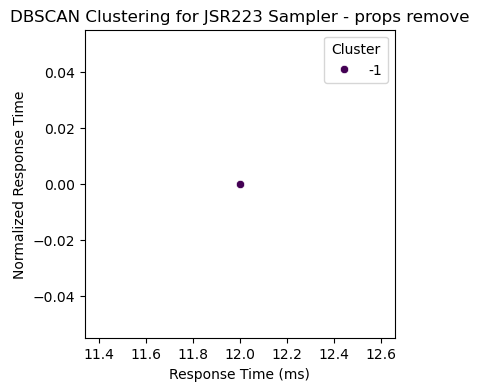

Sample Label: GET_main
Number of clusters found: 1
Clusters: [0]



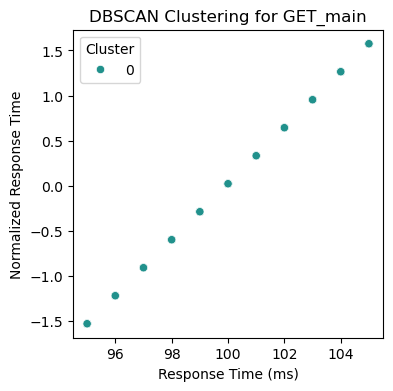

Sample Label: GET_card
Number of clusters found: 2
Clusters: [-1  0  1]



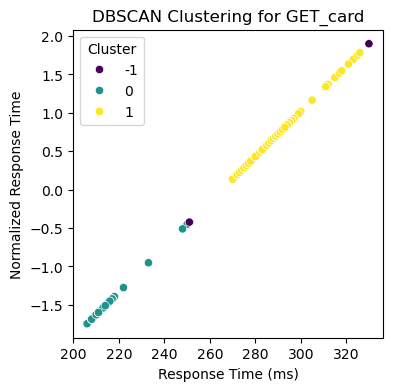

Sample Label: POST_order
Number of clusters found: 1
Clusters: [0]



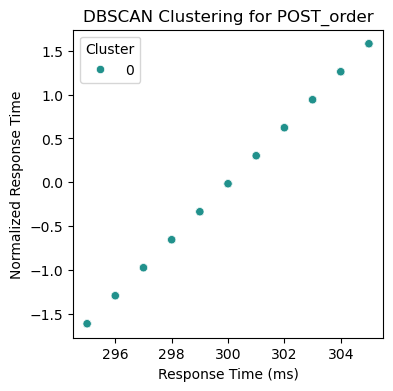

In [20]:
# Настройка параметров DBSCAN
eps = 0.5  # радиус окружности для определения плотности
min_samples = 20  # минимальное количество точек для формирования кластера

# Кластеризация данных для каждого sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]
    X = subset[['responseTime_normalized']].values
    
    # Применение DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = db.fit_predict(X)
    
    # Добавление кластерных меток к подмножеству данных
    subset['cluster'] = clusters
    
    # Обновление данных
    data.loc[data['label'] == label, 'cluster'] = subset['cluster']
    
    # Определение количества уникальных кластеров (исключая -1, который обозначает шум)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    # Вывод информации в консоль
    print(f'Sample Label: {label}')
    print(f'Number of clusters found: {n_clusters}')
    print(f'Clusters: {np.unique(clusters)}')
    print()

# Визуализация
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=subset['elapsed'], y=subset['responseTime_normalized'], hue=subset['cluster'], palette='viridis', legend='full')
    plt.title(f'DBSCAN Clustering for {label}')
    plt.xlabel('Response Time (ms)')
    plt.ylabel('Normalized Response Time')
    plt.legend(title='Cluster')
    plt.show()


In [6]:
data[['label', 'elapsed', 'responseTime_normalized', 'cluster']]


,label,elapsed,responseTime_normalized,cluster
0,JSR223 Sampler - props remove,12,0.000000,-1.0
1,GET_main,98,-0.597222,0.0
2,GET_card,210,-1.628238,0.0
3,POST_order,300,-0.017585,0.0
4,GET_main,103,0.954004,0.0
...,...,...,...,...
2996,GET_card,294,0.841507,1.0
2997,POST_order,298,-0.657050,0.0
2998,GET_main,105,1.574495,0.0
2999,GET_card,293,0.812105,1.0
